In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\dai\Desktop\NLP&CV\Datasets\headlines.csv",header=None)

In [8]:
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


## **Data Preprocessing**

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [10]:
swords=stopwords.words("english")
wnl=WordNetLemmatizer()

In [11]:
def clean_text(sent):
    tokens1=word_tokenize(sent)
    tokens2=[token for token in tokens1 if token.isalpha()]
    tokens3=[token.lower() for token in tokens2 if token.lower() not in swords]
    return tokens3

In [12]:
sent="It was expected raining today. But not completed."

In [13]:
clean_text(sent)

['expected', 'raining', 'today', 'completed']

In [14]:
def lemmatize(word):
    tag=pos_tag([word])
    pos="n"
    wnl=WordNetLemmatizer()
    if tag[0][1].startswith("N"):
        pos="n"
    if tag[0][1].startswith("J"):
        pos="a"
    if tag[0][1].startswith("V"):
        pos="v"
    if tag[0][1].startswith("R"):
        pos="r"
    return(wnl.lemmatize(word,pos=pos))

In [15]:
lemmatize("raining")

'rain'

In [16]:
lemmatize("better")

'well'

In [17]:
lemmatize("players")

'player'

In [18]:
swords.extend(["said","made","make","new","one","say"])

In [19]:
def clean_text(sent):
    tokens1=word_tokenize(sent)
    tokens2=[token for token in tokens1 if token.isalpha()]
    tokens3=[token.lower() for token in tokens2 if token.lower() not in swords]
    tokens4=[lemmatize(token) for token in tokens3]
    return tokens4

In [20]:
clean_text(sent)

['expect', 'rain', 'today', 'complete']

In [21]:
cleaned_text = df[0].apply(clean_text)

In [22]:
cleaned_text

0       [budget, set, scene, election, gordon, brown, ...
1       [army, chief, regiment, decision, military, ch...
2       [howard, denies, split, id, card, michael, how...
3       [observer, monitor, uk, election, minister, in...
4       [kilroy, name, election, seat, target, show, h...
                              ...                        
2220    [india, open, sky, competition, india, allow, ...
2221    [yukos, bankruptcy, u, matter, russian, author...
2222    [survey, confirms, property, slowdown, governm...
2223    [high, fuel, price, hit, ba, profit, british, ...
2224    [u, trade, gap, hit, record, gap, u, export, i...
Name: 0, Length: 2225, dtype: object

In [23]:
final_text = " ".join(cleaned_text[0])

In [24]:
final_text

'budget set scene election gordon brown seek put economy centre labour bid third term power delivers ninth budget gmt expect stress importance continued economic stability low unemployment interest rate chancellor expect freeze petrol duty raise stamp duty threshold conservative lib dems insist voter face high tax labour treasury official giveaway mr brown thought spare increase stamp duty threshold freeze petrol duty extension tax credit scheme poorer family possible help pensioner stamp duty threshold rise intend help first time buyer likely theme three main party general election manifesto ten year ago buyer much great chance avoid stamp duty close half million property england wale alone sell less since average uk property price double start threshold stamp duty increase tax credit result number property incur stamp duty rocket government tax take liberal democrat unveiled proposal raise stamp duty threshold february tory also thought likely propose increase threshold shadow chance

In [25]:
from wordcloud import WordCloud

In [26]:
wcloud=WordCloud(background_color="white").generate(final_text)

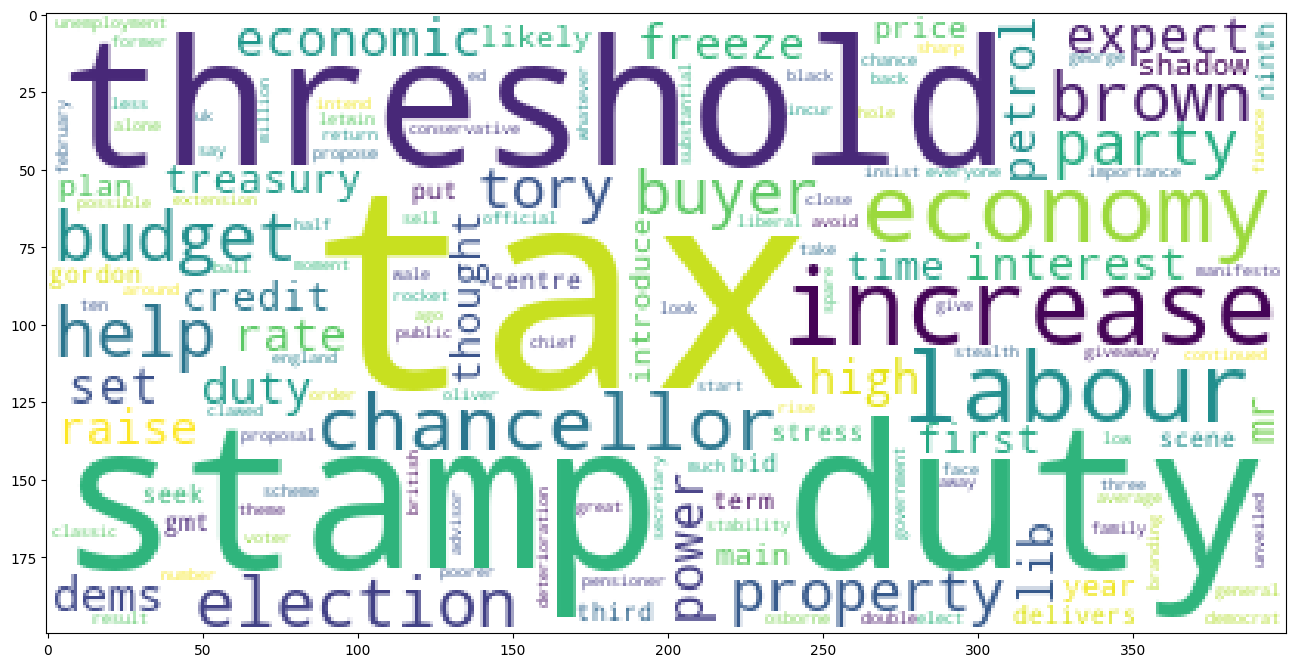

In [27]:
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

## **Vectorization**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf=TfidfVectorizer(analyzer=clean_text)

In [30]:
X_new=tfidf.fit_transform(df[0])

In [31]:
X_new.shape

(2225, 21406)

## **Identify the Clusters**

In [32]:
# pip install kneed

## **Create theClusters**

In [33]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

In [34]:
sse=[]
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    km.fit_predict(X_new)
    sse.append(km.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

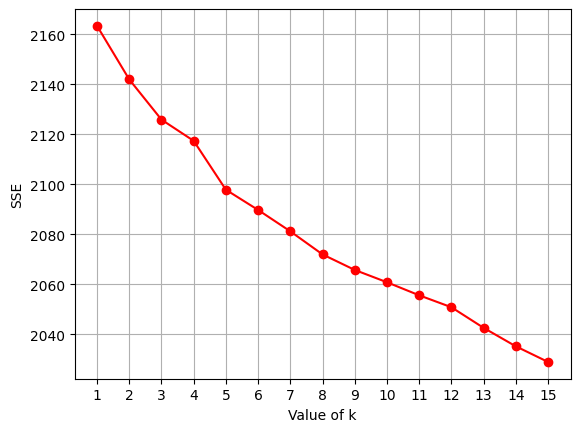

In [35]:
plt.xlabel("Value of k")
plt.ylabel("SSE")
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker="o",color ="r")

In [36]:
kl =KneeLocator(range(1,16),sse,curve="convex",direction="decreasing")

In [37]:
kl.elbow

5

In [38]:
knn= KMeans(n_clusters=5, random_state=0,n_init="auto")
labels = knn.fit_predict(X_new)

In [39]:
labels

array([4, 3, 4, ..., 3, 3, 3])

## **Seperate the clusters**

In [50]:
zero =cleaned_text[labels ==0]
one =cleaned_text[labels ==1]
two =cleaned_text[labels ==2]
three =cleaned_text[labels ==3]
four =cleaned_text[labels ==4]


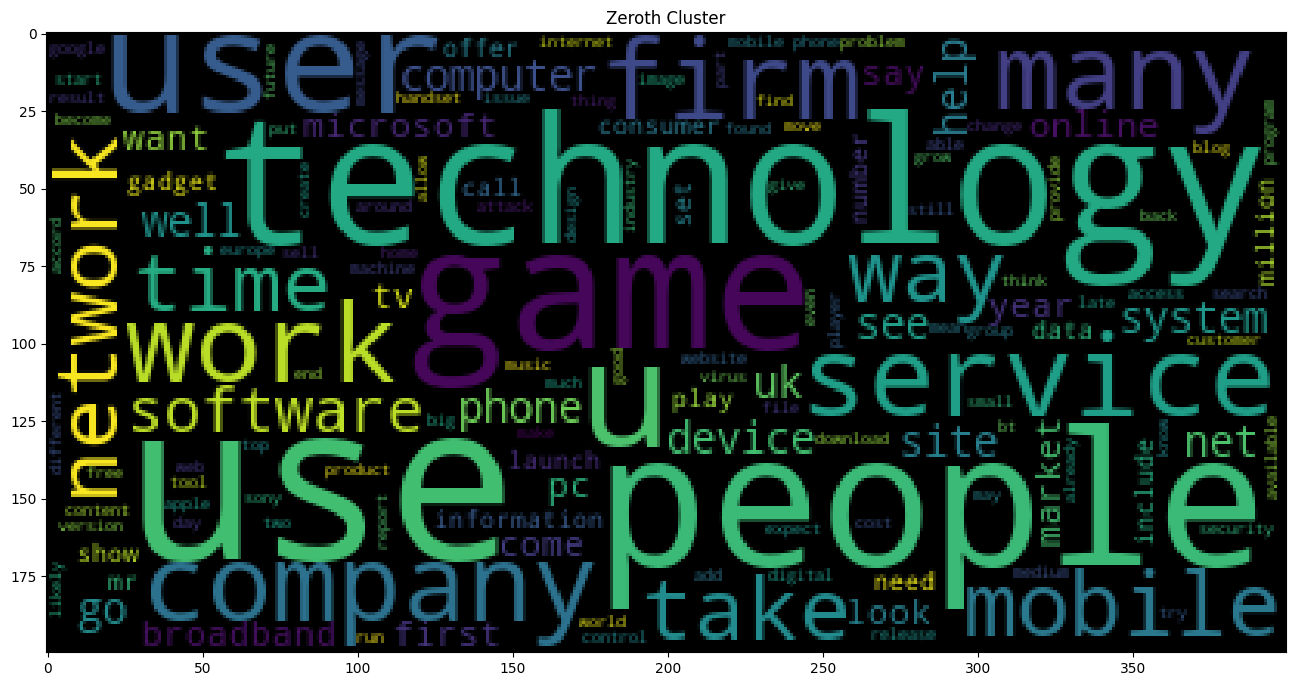

In [51]:
wc0=WordCloud().generate(" ".join(zero.sum()))
plt.figure(figsize=(16,9))
plt.title("Zeroth Cluster")
plt.imshow(wc0)

In [52]:
from nltk import FreqDist

In [60]:
freq=FreqDist(zero.sum())
freq.most_common(10)

[('people', 952),
 ('use', 876),
 ('game', 807),
 ('technology', 602),
 ('mobile', 596),
 ('phone', 552),
 ('service', 525),
 ('also', 516),
 ('mr', 482),
 ('get', 468)]

In [61]:
freq=FreqDist(one.sum())
freq.most_common(10)

[('film', 1002),
 ('best', 605),
 ('award', 563),
 ('year', 558),
 ('star', 434),
 ('show', 431),
 ('music', 372),
 ('also', 367),
 ('u', 325),
 ('include', 317)]

In [62]:
freq=FreqDist(two.sum())
freq.most_common(10)

[('game', 709),
 ('win', 589),
 ('go', 532),
 ('player', 496),
 ('take', 478),
 ('get', 471),
 ('play', 469),
 ('england', 465),
 ('year', 454),
 ('first', 448)]

In [71]:
freq=FreqDist(three.sum())
freq.most_common(10)

[('year', 1114),
 ('u', 952),
 ('mr', 848),
 ('would', 762),
 ('company', 681),
 ('also', 597),
 ('firm', 579),
 ('government', 574),
 ('market', 534),
 ('last', 462)]

In [64]:
freq=FreqDist(four.sum())
freq.most_common(10)

[('mr', 1512),
 ('would', 817),
 ('labour', 732),
 ('party', 675),
 ('election', 626),
 ('blair', 545),
 ('government', 530),
 ('tory', 485),
 ('people', 452),
 ('minister', 420)]

In [72]:
result={
    0:"twchnology",
    1:"movies",
    2:"Sports",
    3:"Finance",
    4:"Politics"
}

In [ ]:
new="""Google rents access to its chips, called tensor processing units (TPUs), through Google Cloud to AI developers.
            
But if recent reports are correct - that the tech company could be in talks to sell its chips to power other data centres - it would represent a significant change.

The news saw Nvidia shares fall nearly 6% on Tuesday, whilst those in Alphabet, Google's parent company, rose by nearly the same percentage.

In the hours following the drop, the chip giant posted on X to state it still offered "greater performance" and "versatility" than the types of chips Google is producing.

In the past year, both Amazon and Microsoft have announced they also have AI chips in development.

Dame Wendy Hall, Regius Professor of Computer Science at the University of Southampton, told the BBC's Today programme the news of the potential deal between Google and Meta was "healthy" for the market.

"Investment is pouring into this area," she said.

"At the moment there is no real return on that investment except for Nvidia"."""

In [74]:
new=tfidf.transform([new])

In [75]:
result[knn.predict(new)[0]]

'Finance'